# **Customer Churn Prediction of Bank**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [10]:
# one hot encoding to categoricl variables
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse=False)
df1 = pd.DataFrame(ohe.fit_transform(df[['Geography','Gender']]))
df1.columns = ohe.get_feature_names_out(['Geography','Gender'])
df = pd.concat([df1,df.drop(columns=['Geography','Gender'])],axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1
1,0.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58,0
2,0.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1
3,0.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0
4,0.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = df.drop(columns=['Exited'])
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,0.0,1.0,0.0,667,34,5,0.00,2,1,0,163830.64
9275,1.0,0.0,1.0,427,42,1,75681.52,1,1,1,57098.00
2995,0.0,0.0,0.0,535,29,2,112367.34,1,1,0,185630.76
5316,0.0,1.0,1.0,654,40,5,105683.63,1,1,0,173617.09
356,0.0,1.0,0.0,850,57,8,126776.30,2,1,1,132298.49
...,...,...,...,...,...,...,...,...,...,...,...
9225,1.0,0.0,0.0,594,32,4,120074.97,2,1,1,162961.79
4859,0.0,1.0,0.0,794,22,4,114440.24,1,1,1,107753.07
3264,0.0,0.0,1.0,738,35,5,161274.05,2,1,0,181429.87
9845,0.0,1.0,0.0,590,38,9,0.00,2,1,1,148750.16


In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-0.5698444 ,  1.74309049, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368,  0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [16]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5021 - loss: 0.7018 - val_accuracy: 0.7969 - val_loss: 0.5282
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.5050 - val_accuracy: 0.7969 - val_loss: 0.4741
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4662 - val_accuracy: 0.7975 - val_loss: 0.4495
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4391 - val_accuracy: 0.8094 - val_loss: 0.4365
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4212 - val_accuracy: 0.8150 - val_loss: 0.4298
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4064 - val_accuracy: 0.8144 - val_loss: 0.4254
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8168 - loss: 0.4243 - val_accuracy: 0.8156 - val_loss: 0.4212
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4117 - val_accu

In [20]:
y_prob = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
print(accuracy_score(y_test, y_pred))

0.7975


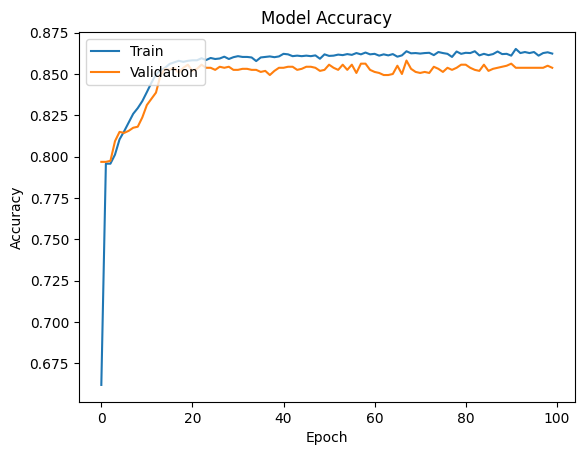

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

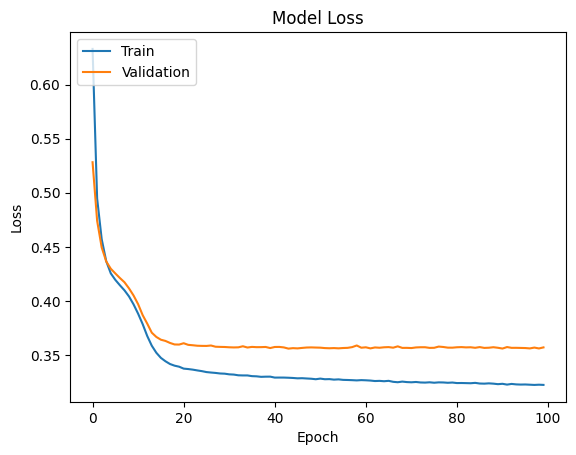

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()